# Function Approximation with Neural Networks

Here we study the possibility to approximate arbitrary functions $f: [0,1]\rightarrow \mathbb{R}$ by using MLPs with a single hidden layer ($n_1$ hidden units). We will follow two strategies to approach this.

## a) Constructive Method

Suitably combine sigmoid functions (with suitable weight and shift parameters) to construct a step function. 

1. Approximate a (rectangular) peak of height 1 with given center location (s) and width (d) with just two sigmoid function. 

2. Approximate given function specified by $n$ supporting values $(x_i, y_i=f(x_i))$ by linearly combining such peaks. You can use a regular grid on the base interval the function is defined on.

3. Test your function with selected test functions - use a fine grid of values to compute the MSE of the approximation to the exact function. 
    * for $x$ in base interval $[0,1]$: $f(x)=x^\alpha*(1-x)^\beta$ for $(\alpha,\beta)=(1,1),(3,3),(1,3),(3,1)$
    * for $x$ in base interval $[-2,2]$: $f(x)=\sin(2\pi x)$
    * another function of your choice.

4. Redo the steps 2 and 3, but now by adding noise to the 'measured' function values $y_i=f(x_i)+\sigma \epsilon$ where $\epsilon\sim \mathcal{N}(0,1)$. 
    * Play with different levels of noise ($\sigma$): e.g. $\sigma = 0.01, 0.05, 0.1, 0.2, 0.5$.
    * How does the noise affect the estimator of the function? Explore the MSE as a function of the noise level. 


## b) Training

We formulate the problem as a (non-linear) regression problem with MSE as cost function. The MSE cost for a neural net with a 1d input $x$, a single hidden layer with $n$ units and a linear output layer is given by

$J_{\rm MSE}(\mathbf{\theta}) = \frac{1}{2m}\sum_{i=1}^m \left(y^{(i)} - (\sum_{k=1}^{n_1} w_{2,k}\sigma(w_{1,k}\cdot x^{(i)} +b_{1,k})+b_2)\right)^2$

1. Use a DL framework of your choice (or directly numpy) to implement the model and the mini-batch gradient descent training algorithm. 
2. Use the data generated in a) as training set. Properly tune the learning rate, batchsize, and number of units in the hidden layer to train the model. Consider normalising the data ($x$- and $y$-values). 
3. Test the trained model with the 
The dataset is given by suitable $x$-values (in the interval $[0,1]$) and associated function values $f(x)$, i.e. $\{(x^{(i)},y^{(i)}\,=\,f(x^{(i)}))\, |\, i=1,\dots,m\}$. The data for the training will be generated on the fly.

Goals:
* Learn how a given function can be represented with a single layer MLP.
* Understand that, in principle, it can be learned from sample data.
* Understand that the optimization based on plain gradient is not always straightforward. 
* Experience that the choice of the hyper-parameters number of hidden units, batchsize, learning rate is tricky. 

## a) Construction Method

In [1]:
# parameter s controls the approximation - slope of the increase to the peak. 
def peak(x, loc, width, s):
    return None

In [2]:
class StepFunction():
    
    def __init__(self, gridpoints, s):
        # TODO
        pass
    
    
    def predict(self, x):
        # TODO
        pass
        

In [3]:
# tests

## b) Training

Plot the learning curves to check that the model is learning something and sufficient!

## Utilities

The following utilities might be helpful. 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_function(x,y):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.show()
    
def plot_compare_function(x,y1,y2, label1='', label2=''):
    plt.plot(x, y1, label=label1)
    plt.xlabel('x')
    plt.plot(x, y2, label=label2)
    if label1 and label2:
        plt.legend()
    plt.show()


In [49]:
def beta_fct(x,alpha,beta):
    """
    Parameters:
    x - input array
    alpha, beta -- larger values lead to more pronounced peaks
    """
    c = alpha/(alpha+beta)
    norm = c**alpha*(1-c)**beta
    return x**alpha*(1-x)**beta/norm

In [50]:
def sin_fct(x,omega):
    """
    Parameters:
    x -- input array
    omega -- frequency that defines the integer number of cycles within the unit interval
    """
    return np.sin(x*2*np.pi*omega)

In [51]:
def generate_inputs(m, func, random=True, vargs=None, sigmaY=0.0):
    """
    Generates m (x,y=f(x))-samples by either generating random x-values in the unit interval (random=True) or by 
    generating a grid of such values. Then the y values (used as labels below) are created from the function object 
    `func`.
    Parameter needed to define the function `func` can be passed as vargs-dict. 
    """
    if random:
        x = np.random.rand(1,m)
    else:
        x = np.linspace(0,1,m).reshape(1,m)
    y = func(x,**vargs) + sigmaY*np.random.randn(*(1,m))
    return x,y

In [52]:
def normalize(X, mu=None, stdev=None):
    """
    Normalizes the data by using z-normalization. If mu and stdev are NOT specified, mean and stedev are 
    computed from the given samples.   

    Returns:
    X1 -- normalized data (array of the same shape as input)
    mu -- mean
    stdev -- standard deviation
    """
    ### START YOUR CODE ###
    if not mu:
        mu = np.mean(X)
    if not stdev:
        stdev = np.std(X)
    X1 = (X-mu)/stdev
    ### END YOUR CODE ###
    
    return X1,mu,stdev

In [53]:
def inv_normalize(X1, mu, stdev):
    """
    Invert the normalization. This is needed to bring the predicted values back to the original scale.

    Returns:
    X -- unnormalized data (array of the same shape as input X1)
    """
    ### START YOUR CODE ###
    X = X1 * stdev + mu
    ### END YOUR CODE ###
    
    return X

### Test

Compute the predicted values on the test set and compute the MSE cost.
Prepare a (x,y)-plot with the ground truth test values and the predicted values. 

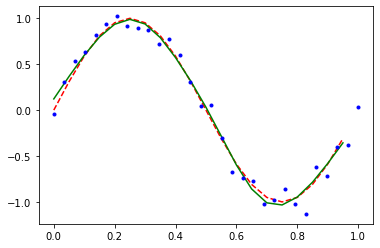

In [109]:
xx = np.arange(0,1,0.05).reshape(1,int(1/0.05))
yy = func(xx, **vargs)
plt.plot(xx[0,:],yy[0,:],'r--')

xx0,_,_ = normalize(xx, muX, stdevX)
yypred0 = predict(xx0, params['W1'],params['b1'],params['W2'],params['b2'])
yypred = inv_normalize(yypred0, muY, stdevY)
plt.plot(xx[0,:],yypred[0,:],'g-')

plt.plot(X[0,:],Y[0,:],'b.')